In [1]:
from nltk.grammar import CFG
from nltk.parse.chart import ChartParser, BU_LC_STRATEGY
from IPython.display import display

In [2]:
grammar = CFG.fromstring("""

S -> T1 T4
T1 -> NNP VBZ
T2 -> DT NN
T3 -> IN NNP
T4 -> T3 | T2 T3
NNP -> 'Tajmahal' | 'Agra' | 'Bangalore' | 'Karnataka' | 'Seoul' | 'Korea'
VBZ -> 'is'
IN -> 'in' | 'of'
DT -> 'the'
NN -> 'capital'
""")

In [3]:
cp = ChartParser(grammar,BU_LC_STRATEGY,trace=True)

|.Seoul .  is  . the  .capita.  of  .Korea .|
|[------]      .      .      .      .      .| [0:1] 'Seoul'
|.      [------]      .      .      .      .| [1:2] 'is'
|.      .      [------]      .      .      .| [2:3] 'the'
|.      .      .      [------]      .      .| [3:4] 'capital'
|.      .      .      .      [------]      .| [4:5] 'of'
|.      .      .      .      .      [------]| [5:6] 'Korea'
|[------]      .      .      .      .      .| [0:1] NNP -> 'Seoul' *
|[------>      .      .      .      .      .| [0:1] T1 -> NNP * VBZ
|.      [------]      .      .      .      .| [1:2] VBZ -> 'is' *
|[-------------]      .      .      .      .| [0:2] T1 -> NNP VBZ *
|[------------->      .      .      .      .| [0:2] S  -> T1 * T4
|.      .      [------]      .      .      .| [2:3] DT -> 'the' *
|.      .      [------>      .      .      .| [2:3] T2 -> DT * NN
|.      .      .      [------]      .      .| [3:4] NN -> 'capital' *
|.      .      [-------------]      .      .| [2:4] T2 -> DT 

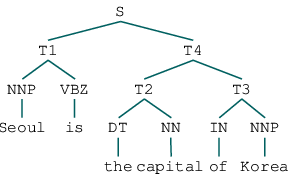

In [6]:
sentence = "Seoul is the capital of Korea"
tokens = sentence.split()
chart = cp.chart_parse(tokens)
parses = list(chart.parses(grammar.start()))

print("Total Edegs :", len(chart.edges()))

for tree in parses:
    print(tree)
    display(tree)